<a href="https://colab.research.google.com/github/achillesposiedon/FacialKeypoints/blob/master/FacialKeypointskaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [0]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [0]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
!kaggle competitions download -c facial-keypoints-detection

test.zip: Skipping, found more recently modified local copy (use --force to force download)
training.zip: Skipping, found more recently modified local copy (use --force to force download)
IdLookupTable.csv: Skipping, found more recently modified local copy (use --force to force download)
SampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
import pandas as pd
import numpy as np
%tensorflow_version 1.x
import tensorflow as tf

trdt=pd.read_csv('training.zip', compression='zip')
tstdt=pd.read_csv('test.zip', compression='zip')

TensorFlow 1.x selected.


In [0]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
print(trdt.shape)
print(tstdt.shape)
print(trdt.columns)
trdt.dtypes


(7049, 31)
(1783, 2)
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')


left_eye_center_x            float64
left_eye_center_y            float64
right_eye_center_x           float64
right_eye_center_y           float64
left_eye_inner_corner_x      float64
left_eye_inner_corner_y      float64
left_eye_outer_corner_x      float64
left_eye_outer_corner_y      float64
right_eye_inner_corner_x     float64
right_eye_inner_corner_y     float64
right_eye_outer_corner_x     float64
right_eye_outer_corner_y     float64
left_eyebrow_inner_end_x     float64
left_eyebrow_inner_end_y     float64
left_eyebrow_outer_end_x     float64
left_eyebrow_outer_end_y     float64
right_eyebrow_inner_end_x    float64
right_eyebrow_inner_end_y    float64
right_eyebrow_outer_end_x    float64
right_eyebrow_outer_end_y    float64
nose_tip_x                   float64
nose_tip_y                   float64
mouth_left_corner_x          float64
mouth_left_corner_y          float64
mouth_right_corner_x         float64
mouth_right_corner_y         float64
mouth_center_top_lip_x       float64
m

In [0]:
trdt.Image[0]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

In [0]:
ytrain=trdt.drop('Image', axis=1)
ytrain=ytrain.values.flatten()
ytrain.shape

(211470,)

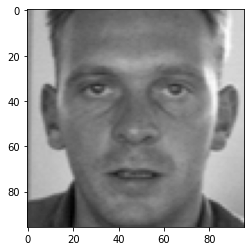

In [0]:
import matplotlib.pyplot as plt

imag = []
for i in range(0,7049):
    img = trdt['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)

image_list = np.array(imag,dtype = 'float')
xtrain = image_list.reshape(-1,96,96,1)

plt.imshow(xtrain[2].reshape(96,96),cmap='gray')
plt.show()

In [0]:
print(xtrain.shape)

(7049, 96, 96, 1)


In [0]:
model = Sequential()
model.add(Conv2D(96, kernel_size=(5,5), input_shape=(96,96,1)))
model.add(Conv2D(96, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(96, kernel_size=(3,3)))
model.add(Conv2D(96, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(812, activation=tf.nn.relu))

model.add(Dropout(0.2))
model.add(Dense(1024, activation=tf.nn.relu))

model.add(Dropout(0.2))
model.add(Dense(1024, activation=tf.nn.relu))

model.add(Dropout(0.2))
model.add(Dense(1024, activation=tf.nn.relu))

model.add(Dense(30,activation=tf.nn.softmax))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
ytrain=trdt.drop('Image')

KeyError: ignored